In [7]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models
from cellpose.io import imread

# model_type='cyto' or 'nuclei' or 'cyto2'
model = models.Cellpose(gpu=True, model_type="cyto")

# list of files
# PUT PATH TO YOUR FILES HERE!
files = [
    "D:\\xing-vimentin-dic-pipeline\\src\\livecell_dev\\cxa-data\\annotation\\Yajushi\\day0Notreat_Group_1_wellA1_RI_MIP_stitched\\T50\\img.png",
    "D:\\xing-vimentin-dic-pipeline\\src\\livecell_dev\\cxa-data\\annotation\\Yajushi\\day0Notreat_Group_1_wellA1_RI_MIP_stitched\\T100\\img.png",
    "D:\\xing-vimentin-dic-pipeline\\src\\livecell_dev\\cxa-data\\annotation\\Nandita Puri\\Orignal Images\\restart_day0\\50th.png",
    "D:\\xing-vimentin-dic-pipeline\\src\\livecell_dev\\cxa-data\\annotation\\Nandita Puri\\Orignal Images\\restart_day0\\100th.png",
]
imgs = [imread(f) for f in files]
nimg = len(imgs)


In [8]:
# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[0, 0]]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

masks, flows, styles, diams = model.eval(imgs, diameter=150, channels=channels)


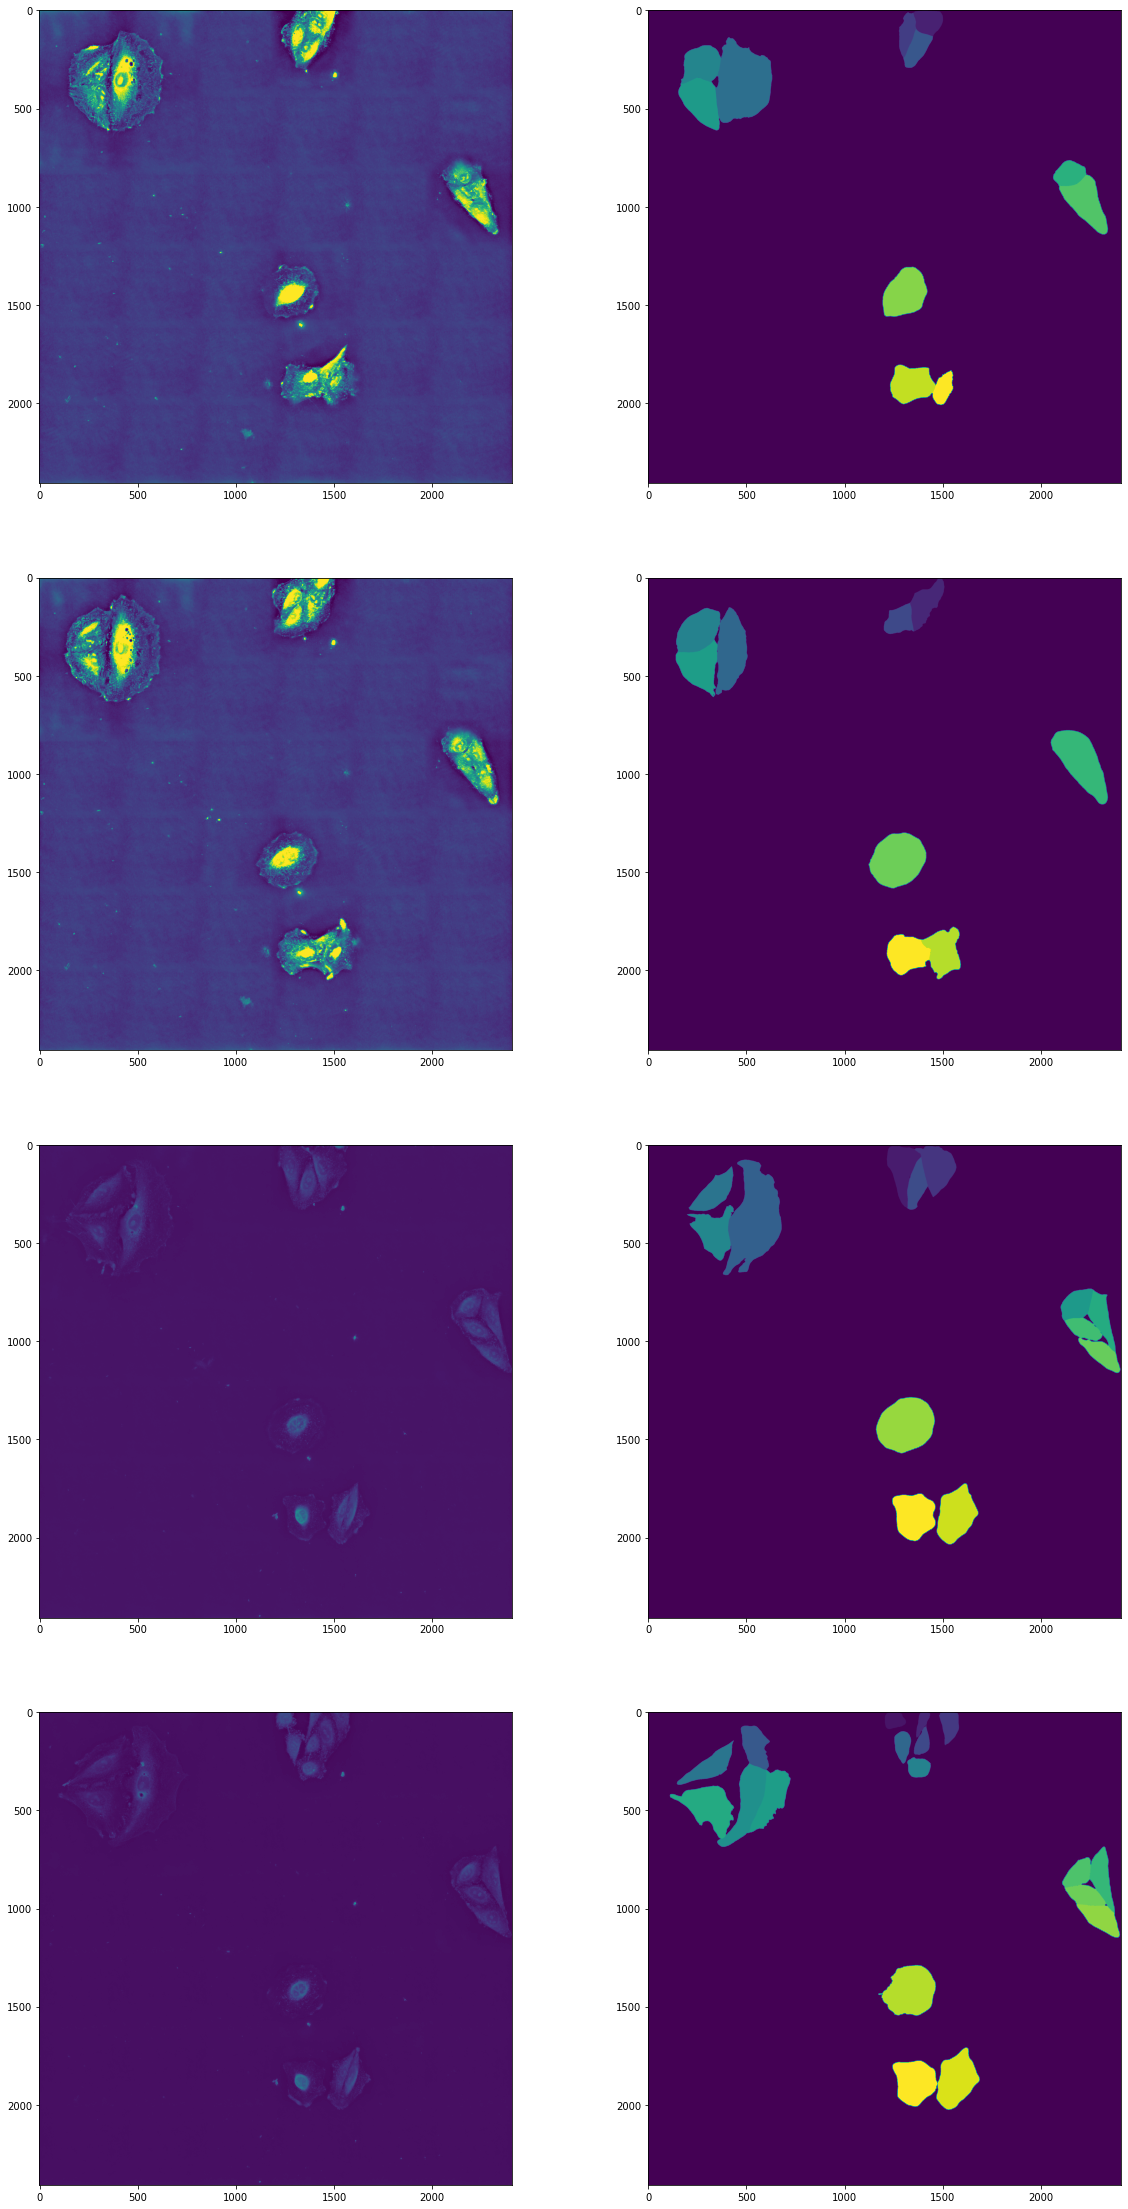

In [10]:
fig, axes = plt.subplots(nimg, 2, figsize=(20, 10 * nimg))

for idx in range(nimg):
    axes[idx, 0].imshow(imgs[idx])
    axes[idx, 1].imshow(masks[idx])
